In [7]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests


In [8]:
df=pd.read_csv('clean.csv')
print(df.shape)
df.head()

(7425, 9)


,link,price,area,room,toilet,address,quan,loai_bds,price-VND
0,https://mogi.vn/quan-lien-chieu/mua-dat-nen-du...,NaN,100,0,0,"Nguyễn Tất Thành, Phường Hoà Hiệp Nam, Quận Li...",quan-lien-chieu,mua-dat-nen-du-an/,0
1,https://mogi.vn/quan-lien-chieu/mua-dat-nen-du...,NaN,100,0,0,"Nguyễn Lương Bằng, Phường Hoà Hiệp Nam, Quận L...",quan-lien-chieu,mua-dat-nen-du-an/,0
2,https://mogi.vn/quan-hai-chau/mua-nha-mat-tien...,100.000 đ,120,4,5,"Bạch Đằng, Phường Hải Châu I, Quận Hải Châu, Đ...",quan-hai-chau,mua-nha-mat-tien-pho/,100000
3,https://mogi.vn/quan-hai-chau/mua-nha-biet-thu...,100.000 đ,120,4,6,"Hoá Sơn 10, Phường Hòa Cường Nam, Quận Hải Châ...",quan-hai-chau,mua-nha-biet-thu-lien-ke/,100000
4,https://mogi.vn/quan-son-tra/mua-nha-mat-tien-...,105.000 đ,81,7,7,"Thạch Lam, Phường Phước Mỹ, Quận Sơn Trà, Đà Nẵng",quan-son-tra,mua-nha-mat-tien-pho/,105000


In [9]:
unique_quan = df['quan'].unique()
print(unique_quan)
unique_loai_bds = df['loai_bds'].unique()
print(unique_loai_bds)

['quan-lien-chieu' 'quan-hai-chau' 'quan-son-tra' 'quan-cam-le'
 'quan-thanh-khe' 'quan-ngu-hanh-son' 'huyen-hoa-vang']
['mua-dat-nen-du-an/' 'mua-nha-mat-tien-pho/' 'mua-nha-biet-thu-lien-ke/'
 'mua-can-ho-chung-cu/' 'mua-dat-tho-cu/' 'mua-nha-hem-ngo/'
 'mua-can-ho-dich-vu/' 'mua-mat-bang-cua-hang-shop-nhieu-muc-dich/'
 'mua-duong-noi-bo/' 'mua-can-ho-tap-the-cu-xa/'
 'mua-mat-bang-cua-hang-shop-cafe-do-uong/' 'mua-can-ho-penthouse/'
 'mua-dat-kho-xuong/' 'mua-dat-nong-nghiep/'
 'mua-cua-hang-shop-shophouse/' 'mua-dat/' 'mua-can-ho-officetel/']


In [10]:
df['quan-code'] = pd.Categorical(df['quan'])
print(df['quan-code'].cat.categories)
df['quan-code'] = df['quan-code'].cat.codes
df['loai_bds-code'] = pd.Categorical(df['loai_bds'])
print(df['loai_bds-code'].cat.categories)
df['loai_bds-code'] = df['loai_bds-code'].cat.codes
df.drop(['loai_bds', 'quan','price','link'], axis=1, inplace=True)
df

Index(['huyen-hoa-vang', 'quan-cam-le', 'quan-hai-chau', 'quan-lien-chieu',
       'quan-ngu-hanh-son', 'quan-son-tra', 'quan-thanh-khe'],
      dtype='object')
Index(['mua-can-ho-chung-cu/', 'mua-can-ho-dich-vu/', 'mua-can-ho-officetel/',
       'mua-can-ho-penthouse/', 'mua-can-ho-tap-the-cu-xa/',
       'mua-cua-hang-shop-shophouse/', 'mua-dat-kho-xuong/',
       'mua-dat-nen-du-an/', 'mua-dat-nong-nghiep/', 'mua-dat-tho-cu/',
       'mua-dat/', 'mua-duong-noi-bo/',
       'mua-mat-bang-cua-hang-shop-cafe-do-uong/',
       'mua-mat-bang-cua-hang-shop-nhieu-muc-dich/',
       'mua-nha-biet-thu-lien-ke/', 'mua-nha-hem-ngo/',
       'mua-nha-mat-tien-pho/'],
      dtype='object')


,area,room,toilet,address,price-VND,quan-code,loai_bds-code
0,100,0,0,"Nguyễn Tất Thành, Phường Hoà Hiệp Nam, Quận Li...",0,3,7
1,100,0,0,"Nguyễn Lương Bằng, Phường Hoà Hiệp Nam, Quận L...",0,3,7
2,120,4,5,"Bạch Đằng, Phường Hải Châu I, Quận Hải Châu, Đ...",100000,2,16
3,120,4,6,"Hoá Sơn 10, Phường Hòa Cường Nam, Quận Hải Châ...",100000,2,14
4,81,7,7,"Thạch Lam, Phường Phước Mỹ, Quận Sơn Trà, Đà Nẵng",105000,5,16
...,...,...,...,...,...,...,...
7420,76,3,2,"Nguyễn Thi, Phường Hòa Cường Nam, Quận Hải Châ...",5500000000000,2,16
7421,92,3,2,"Tú Mỡ, Phường Hòa An, Quận Cẩm Lệ, Đà Nẵng",6992000000000,1,16
7422,100,4,2,"Thanh Huy 1, Phường Thanh Khê Đông, Quận Thanh...",7800000000000,6,16
7423,151,3,2,"Nguyễn Văn Thoại, Phường Mỹ An, Quận Ngũ Hành ...",14798000000000,4,16


In [11]:
df['price-per-m2'] = df['price-VND'] / df['area']
df['price-per-m2']=df['price-per-m2'].astype(np.int64)
df

,area,room,toilet,address,price-VND,quan-code,loai_bds-code,price-per-m2
0,100,0,0,"Nguyễn Tất Thành, Phường Hoà Hiệp Nam, Quận Li...",0,3,7,0
1,100,0,0,"Nguyễn Lương Bằng, Phường Hoà Hiệp Nam, Quận L...",0,3,7,0
2,120,4,5,"Bạch Đằng, Phường Hải Châu I, Quận Hải Châu, Đ...",100000,2,16,833
3,120,4,6,"Hoá Sơn 10, Phường Hòa Cường Nam, Quận Hải Châ...",100000,2,14,833
4,81,7,7,"Thạch Lam, Phường Phước Mỹ, Quận Sơn Trà, Đà Nẵng",105000,5,16,1296
...,...,...,...,...,...,...,...,...
7420,76,3,2,"Nguyễn Thi, Phường Hòa Cường Nam, Quận Hải Châ...",5500000000000,2,16,72368421052
7421,92,3,2,"Tú Mỡ, Phường Hòa An, Quận Cẩm Lệ, Đà Nẵng",6992000000000,1,16,76000000000
7422,100,4,2,"Thanh Huy 1, Phường Thanh Khê Đông, Quận Thanh...",7800000000000,6,16,78000000000
7423,151,3,2,"Nguyễn Văn Thoại, Phường Mỹ An, Quận Ngũ Hành ...",14798000000000,4,16,98000000000


In [13]:
def get_location(address):
    key='vjAq0L5maVjKRByqnmtyywFKkzzR7VIB'
    url='https://www.mapquestapi.com/geocoding/v1/address?key='
    main_url=url+key+'&location='+address
    r=requests.get(main_url)
    data=r.json()['results'][0]
    location=data['locations'][0]
    lat=location['latLng']['lat']
    long=location['latLng']['lng']
    print(lat,long)
    return pd.Series({'lat': lat, 'long': long})


# Áp dụng hàm apply và gán kết quả vào DataFrame
df[['lat', 'long']] = df['address'].apply(get_location)

16.1061 108.13558
16.09512 108.13844
16.07079 108.22511
16.03346 108.23031
16.05685 108.24449
16.03163 108.22407
16.00844 108.22669
16.09227 108.23095
16.09227 108.23095
16.07401 108.18057
16.07686 108.23455
16.02983 108.25417
16.02611 108.24381
16.04892 108.24906
16.08423 108.24587
16.08423 108.24587
16.08423 108.24587
16.08521 108.24371
16.08423 108.24587
16.08417 108.21861
16.05684 108.20377
16.03851 108.24755
16.08423 108.24587
16.08423 108.24587
16.08423 108.24587
16.08423 108.24587
16.08423 108.24587
16.03274 108.23179
16.08804 108.23032
16.03851 108.24755
16.08804 108.23032
16.00902 108.21925
16.04812 108.23801
16.0598 108.23051
16.09227 108.23095
16.05524 108.23262
16.0598 108.23051
16.01217 108.22218
16.00145 108.22203
16.0598 108.23051
16.0598 108.23051
16.05169 108.21802
16.0734 108.22889
16.03941 108.2377
16.12217 108.12213
16.07743 108.16546
16.08423 108.24587
16.09512 108.13844
16.03746 108.0676
15.99107 108.23758
15.98967 108.26234
16.0854 108.23467
16.04645 108.1776
16.

In [38]:
df.head()
df.drop(['address'],axis=1,inplace=True)
df.to_csv('data.csv',index=False)
df.head()

,area,room,toilet,price-VND,quan-code,loai_bds-code,price-per-m2,lat,long
0,100,0,0,0,3,7,0,16.10610,108.13558
1,100,0,0,0,3,7,0,16.09512,108.13844
2,120,4,5,100000,2,16,833,16.07079,108.22511
3,120,4,6,100000,2,14,833,16.03346,108.23031
4,81,7,7,105000,5,16,1296,16.05685,108.24449


In [165]:
df=pd.read_csv('data.csv')
print(df.shape)
df.describe()

(7425, 9)


,area,room,toilet,price-VND,quan-code,loai_bds-code,price-per-m2,lat,long
count,7.425000e+03,7425.000000,7425.000000,7.425000e+03,7425.000000,7425.000000,7.425000e+03,7425.000000,7425.000000
mean,1.624510e+03,2.384916,2.230572,6.371146e+10,3.485118,12.686195,1.760870e+08,16.054384,108.188004
std,1.276699e+05,4.241972,4.256734,3.959121e+12,1.642750,4.886272,2.613941e+09,0.266565,2.150053
min,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,15.951100,-77.031960
25%,6.700000e+01,0.000000,0.000000,2.950000e+09,2.000000,9.000000,3.809524e+07,16.036920,108.196790
50%,9.000000e+01,2.000000,2.000000,4.700000e+09,4.000000,15.000000,5.925926e+07,16.055190,108.217690
75%,1.190000e+02,3.000000,3.000000,8.900000e+09,5.000000,16.000000,8.593750e+07,16.071460,108.237580
max,1.100000e+07,100.000000,100.000000,3.404500e+14,6.000000,16.000000,9.800000e+10,38.890370,108.296600


In [166]:

from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(df, test_size=0.25, random_state=1)
print(data_train.isna().sum())

area             0
room             0
toilet           0
price-VND        0
quan-code        0
loai_bds-code    0
price-per-m2     0
lat              0
long             0
dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16112\1165548496.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train['price-per-m2'],kde=True,bins=30)


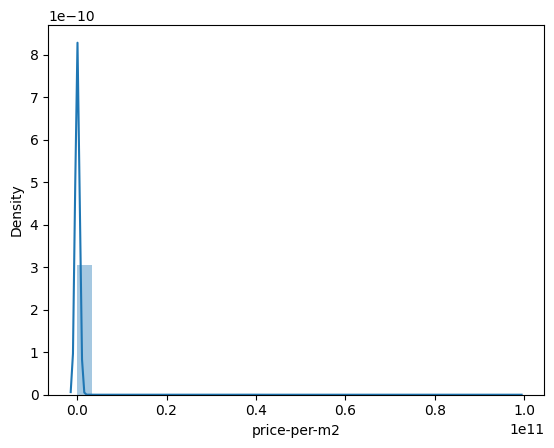

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16112\1165548496.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train['area'],kde=True,bins=30)


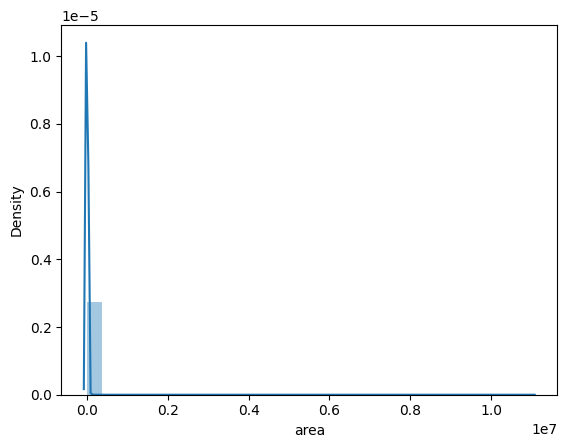

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16112\1165548496.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train['room'],kde=True,bins=30)


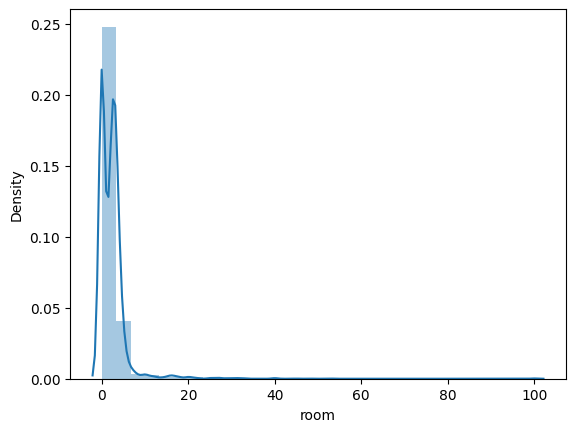

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16112\1165548496.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train['toilet'],kde=True,bins=30)


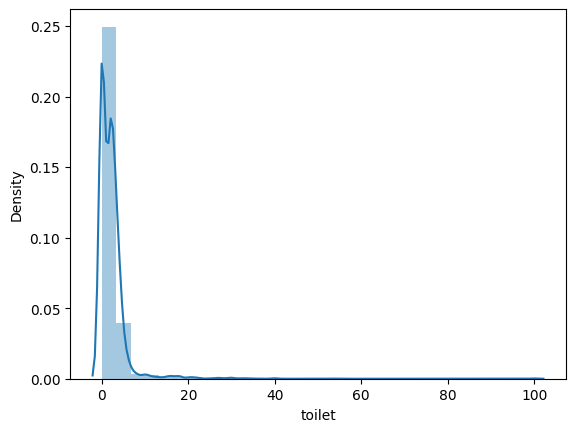

In [167]:
sns.distplot(data_train['price-per-m2'],kde=True,bins=30)
plt.show()
sns.distplot(data_train['area'],kde=True,bins=30)
plt.show()
sns.distplot(data_train['room'],kde=True,bins=30)
plt.show()
sns.distplot(data_train['toilet'],kde=True,bins=30)
plt.show()

In [168]:
import numpy as np

def outliers_iqr_Train(column):
  q1, q3 = np.percentile(data_train[column], [25, 75])
  iqr = q3 - q1
  lower_bridge = q1 - (iqr * 1.5)
  upper_bridge = q3 + (iqr * 1.5)
  df = data_train[data_train[column] >= lower_bridge]
  df = df[df[column] <= upper_bridge]
  return df

def outliers_iqr_Test(column):
  q1, q3 = np.percentile(data_test[column], [25, 75])
  iqr = q3 - q1
  lower_bridge = q1 - (iqr * 1.5)
  upper_bridge = q3 + (iqr * 1.5)
  df = data_test[data_test[column] >= lower_bridge]
  df = df[df[column] <= upper_bridge]
  return df
data_train=outliers_iqr_Train('price-per-m2')
data_test=outliers_iqr_Test('price-per-m2')
data_train=outliers_iqr_Train('area')
data_test=outliers_iqr_Test('area')
data_train=outliers_iqr_Train('room')
data_test=outliers_iqr_Test('room')
data_train=outliers_iqr_Train('toilet')
data_test=outliers_iqr_Test('toilet')



C:\Users\ASUS\AppData\Local\Temp\ipykernel_16112\1367676876.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train['price-per-m2'],kde=True,bins=50)


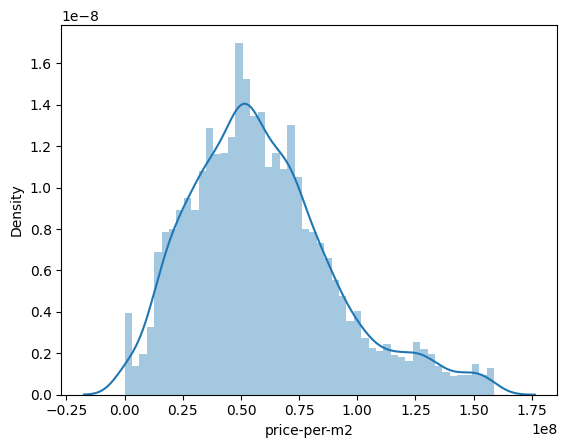

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16112\1367676876.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_test['price-per-m2'],kde=True,bins=50)


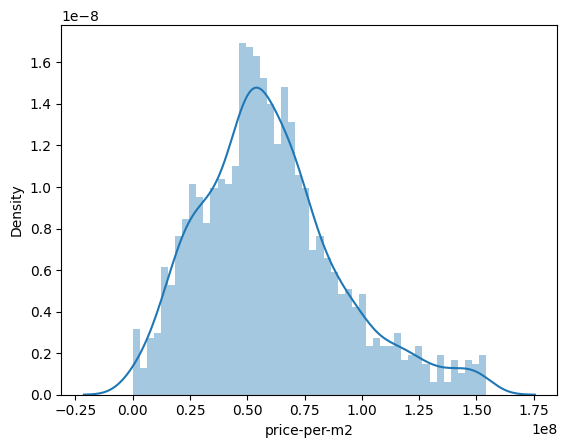

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16112\1367676876.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train['area'],kde=True,bins=50)


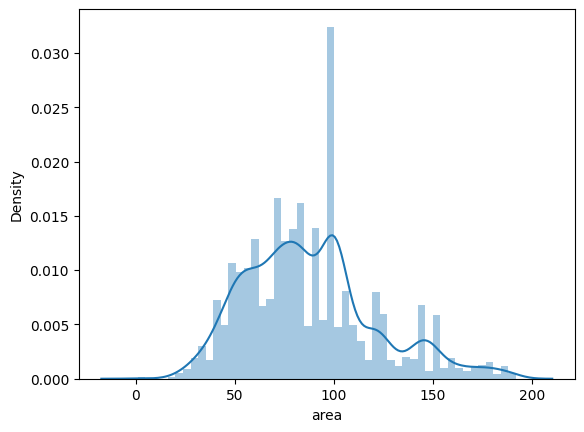

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16112\1367676876.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_test['area'],kde=True,bins=50)


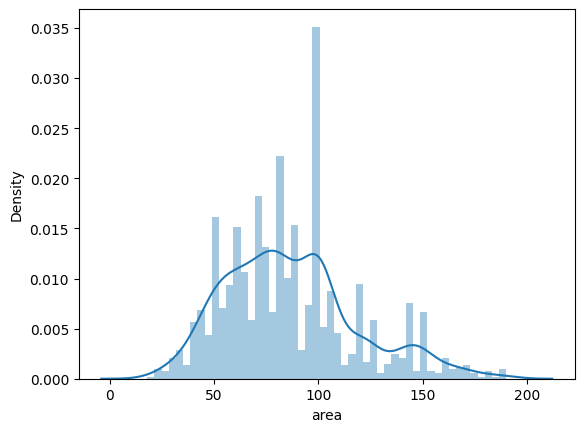

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16112\1367676876.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train['room'],kde=True,bins=50)


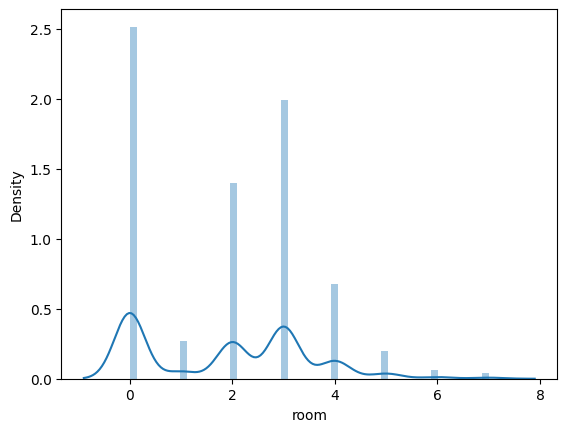

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16112\1367676876.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_test['room'],kde=True,bins=50)


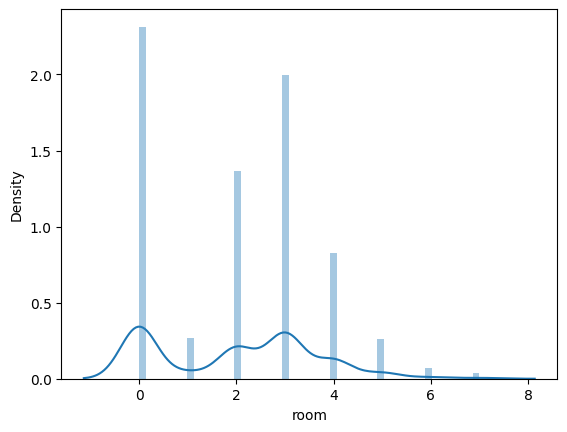

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16112\1367676876.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train['toilet'],kde=True,bins=50)


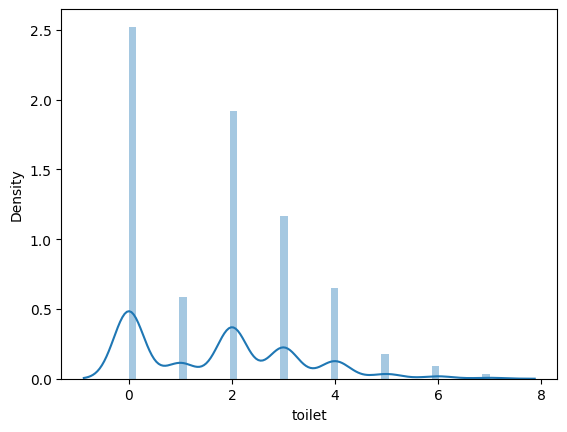

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16112\1367676876.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_test['toilet'],kde=True,bins=50)


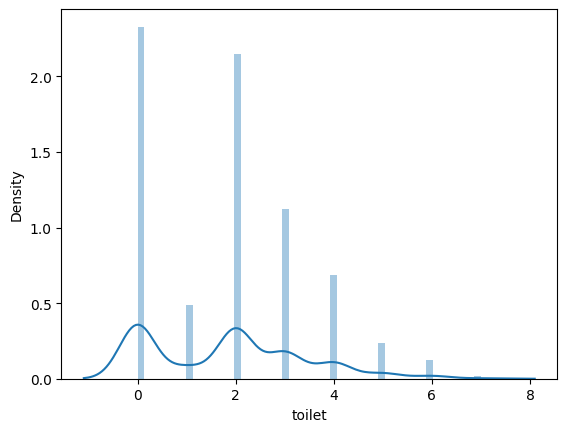

In [169]:
sns.distplot(data_train['price-per-m2'],kde=True,bins=50)
plt.show()
sns.distplot(data_test['price-per-m2'],kde=True,bins=50)
plt.show()
sns.distplot(data_train['area'],kde=True,bins=50)
plt.show()
sns.distplot(data_test['area'],kde=True,bins=50)
plt.show()
sns.distplot(data_train['room'],kde=True,bins=50)
plt.show()
sns.distplot(data_test['room'],kde=True,bins=50)
plt.show()
sns.distplot(data_train['toilet'],kde=True,bins=50)
plt.show()
sns.distplot(data_test['toilet'],kde=True,bins=50)
plt.show()




In [170]:
data_train.drop(['price-per-m2'],axis=1,inplace=True)
data_test.drop(['price-per-m2'],axis=1,inplace=True)
data_train.describe()

,area,room,toilet,price-VND,quan-code,loai_bds-code,lat,long
count,4612.000000,4612.000000,4612.000000,4.612000e+03,4612.000000,4612.000000,4612.000000,4612.000000
mean,87.871206,1.870989,1.705768,5.177498e+09,3.495447,12.443625,16.056301,108.171297
std,32.940321,1.616323,1.574281,3.789739e+09,1.662274,5.066000,0.337518,2.727900
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,15.951100,-77.031960
25%,63.000000,0.000000,0.000000,2.700000e+09,2.000000,9.000000,16.037340,108.191153
50%,84.000000,2.000000,2.000000,4.150000e+09,3.000000,15.000000,16.055190,108.216990
75%,102.000000,3.000000,3.000000,6.500000e+09,5.000000,16.000000,16.071967,108.236040
max,192.000000,7.000000,7.000000,2.770000e+10,6.000000,16.000000,38.890370,108.275660


In [171]:
print(data_train.shape)
print(data_train.isna().sum())

(4612, 8)
area             0
room             0
toilet           0
price-VND        0
quan-code        0
loai_bds-code    0
lat              0
long             0
dtype: int64


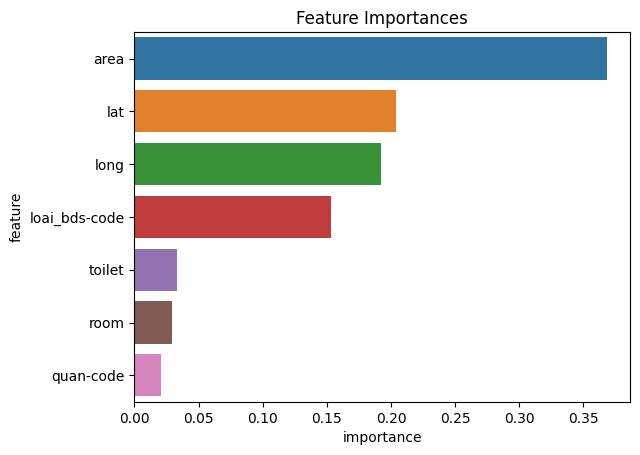

In [176]:
from sklearn.ensemble import RandomForestRegressor
x = data_train.drop('price-VND', axis=1)
y = data_train['price-VND'].astype(np.int64)

# Fit RandomForest model
rf = RandomForestRegressor()
rf.fit(x, y)

# lấy đặc trưng quan trọng
importances = pd.DataFrame({'feature': x.columns, 'importance': rf.feature_importances_})
importances = importances.sort_values('importance', ascending=False)

# Plot
sns.barplot(x='importance', y='feature', data=importances)
plt.title('Feature Importances')
plt.show()

In [180]:
data_train_save = data_train.drop(['quan-code'], axis=1)
data_test_save = data_test.drop(['quan-code'], axis=1)

In [181]:
print(data_train_save.shape)
print(data_train_save.shape)

(4612, 7)
(4612, 7)


In [179]:
data_train_save.to_csv('train_data.csv', index=False)
data_train_save.to_csv('test_data.csv', index=False)

In [137]:
df.to_csv('data.csv',index=False)
df

,area,room,toilet,price-VND,quan-code,loai_bds-code,price-per-m2,lat,long
0,100,0,0,0,3,7,0,16.10610,108.13558
1,100,0,0,0,3,7,0,16.09512,108.13844
2,120,4,5,100000,2,16,833,16.07079,108.22511
3,120,4,6,100000,2,14,833,16.03346,108.23031
4,81,7,7,105000,5,16,1296,16.05685,108.24449
...,...,...,...,...,...,...,...,...,...
7420,76,3,2,5500000000000,2,16,72368421052,16.03214,108.23095
7421,92,3,2,6992000000000,1,16,76000000000,16.05304,108.17310
7422,100,4,2,7800000000000,6,16,78000000000,16.06942,108.18316
7423,151,3,2,14798000000000,4,16,98000000000,16.05638,108.24681
